In [8]:
# Criando o array de imagens

import os
files_path = [os.path.abspath(x) for x in os.listdir('./') if x.endswith('.jpg')]
print(files_path)



['/home/lucas/Documentos/UnB/10º_Semestre/Visao_Computacional/ProjetoFinalVisao/radio41.jpg', '/home/lucas/Documentos/UnB/10º_Semestre/Visao_Computacional/ProjetoFinalVisao/radio33.jpg', '/home/lucas/Documentos/UnB/10º_Semestre/Visao_Computacional/ProjetoFinalVisao/radio28.jpg', '/home/lucas/Documentos/UnB/10º_Semestre/Visao_Computacional/ProjetoFinalVisao/radio42.jpg', '/home/lucas/Documentos/UnB/10º_Semestre/Visao_Computacional/ProjetoFinalVisao/radio49.jpg', '/home/lucas/Documentos/UnB/10º_Semestre/Visao_Computacional/ProjetoFinalVisao/radio46.jpg', '/home/lucas/Documentos/UnB/10º_Semestre/Visao_Computacional/ProjetoFinalVisao/radio44.jpg', '/home/lucas/Documentos/UnB/10º_Semestre/Visao_Computacional/ProjetoFinalVisao/radio24.jpg', '/home/lucas/Documentos/UnB/10º_Semestre/Visao_Computacional/ProjetoFinalVisao/radio45.jpg', '/home/lucas/Documentos/UnB/10º_Semestre/Visao_Computacional/ProjetoFinalVisao/radio23.jpg', '/home/lucas/Documentos/UnB/10º_Semestre/Visao_Computacional/ProjetoF

In [92]:
# Lista das áreas de interesse das radiografias:

areaInteresse = [[1328,314,1718,1088], #radio01
              [840,1167,1179,1368], #radio02
              [708,546,1032,858], #radio03
              [270,468,1419,1644], #radio04
              [855,300,1260,681], #radio05
              [936,375,1218,774], #radio06
              [540,748,1318,1050], #radio07
              [786,177,1164,471], #radio08
              [951,1080,1287,1326], #radio09
              [456,72,1047,540], #radio10
              [660,27,1230,363], #radio11
              [618,864,1131,1644], #radio12
              [585,174,879,714], #radio13
              [444,1230,717,1707], #radio14
              [360,1320,696,1611], #radio15
              [417, 900, 1190, 1494], #radio16
              [708, 690, 1248, 888], #radio17
              [249, 906, 957, 1074], #radio18
              [798,1068, 1029, 1341], #radio19
              [754, 578, 1140, 1320], #radio20
              [25, 268, 436, 342], #radio21
              [159, 99, 265, 163], #radio22
              [188, 122, 291, 211], #radio23
              [192, 133, 308, 229], #radio24
              [19, 354, 207, 624], #radio25
              [184, 544, 412, 834], #radio26
              [108, 168, 397, 481], #radio27
              [288, 299, 441, 415], #radio28
              [207, 276, 343, 505], #radio29
              [235, 421, 333, 500], #radio30
              [145,530,273,621], #radio31
              [263,321,359,410], #radio32
              [207,421,380,517], #radio33
              [165, 519, 262, 582], #radio34
              [211, 579, 357, 640], #radio35
              [254,204,331,269], #radio36
              [208, 218, 311, 281], #radio37
              [235, 274, 447, 408], #radio38
              [157,161,257,285], #radio39
              [313,300,472,436], #radio40
              [154,99,353,258], #radio41
              [188,575,447,741], #radio42
              [417,17,707,172], #radio43
              [61,297,434,332], #radio44
              [0,0,721,918], #radio45
              [0,0,490,482], #radio46
              [145, 197, 218, 259], #radio47
              [234,117,376,248], #radio48
              [444, 0, 658, 199], #radio49
              [73, 14, 202, 289], #radio50
              [513, 376, 764, 508], #radio51
              [248, 283, 385, 433]] #radio52

radio1.jpg
Imagem com o corpo estranho destacado:


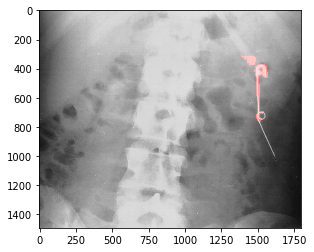

Imagem somente do corpo estranho:


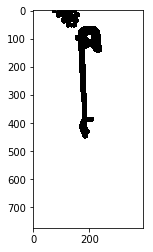

radio2.jpg
Imagem com o corpo estranho destacado:


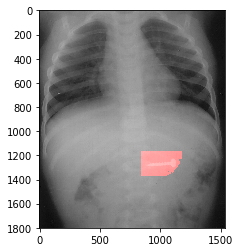

Imagem somente do corpo estranho:


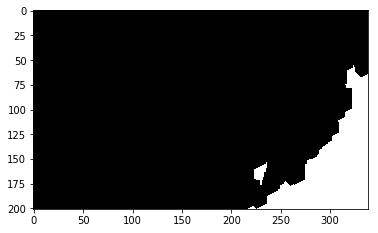

In [226]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def detectarCorpoEstranho(caminhoImagem,margemDeErro, x0,y0,x1,y1):
    
    #Criando imagem
    imagemProcessada = cv2.imread(caminhoImagem)    
    
    imagemRecebida = imagemProcessada
    
    #Colocando a imagem em nível de cinza
    imagemRecebida = cv2.cvtColor(imagemRecebida, cv2.COLOR_RGB2GRAY)
    
    
    #Recortando a imagem na area de Interesse
    imagemRecebida = imagemRecebida[y0:y1,x0:x1]
        
    
    #Coletando informações necessárias para imagem
    quantidadeLinhas, quantidadeColunas = imagemRecebida.shape

    
    #Diminuindo níveis de pixels da imagem de 0 a 255 para 0 a 10
    for i in range(quantidadeLinhas):
        for j in range(quantidadeColunas):
            imagemRecebida[i][j] = imagemRecebida[i][j] / 25 

            
    #Dilatando as estruturas da imagem buscando deixar corpos estranhos menores mais evidentes
    elementoEstruturante = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4,4))
    imagemRecebida = cv2.dilate(imagemRecebida, elementoEstruturante, iterations = 5)


    
    #Como as imagens da base possuem um padrão em que geralmente os corpos estranhos estão
    #com pixels mais pertos do branco é necessário descobrir qual é o valor de pixel mais alto
    maiorValorPixel = max([valor for quantidadeLinhas in imagemRecebida for valor in quantidadeLinhas])
    
    #Tendo o valor de pixel mais alto encontrado adiciona-se uma margem de erro a este pixel, define-se
    #um intervalo e se busca todos os pixels encontrados neste intervalo
    _,  corpoEstranho = cv2.threshold(imagemRecebida, maiorValorPixel-margemDeErro, maiorValorPixel, cv2.THRESH_BINARY_INV)
    
    

    
    for i in range(quantidadeLinhas):
        for j in range(quantidadeColunas):
            if(corpoEstranho[i][j] == 0):
                imagemProcessada[i+y0,j+x0,0] = 255

    imagens = [imagemProcessada, corpoEstranho]
    
    return imagens

for i in range(2):


    ## NOME DA IMAGEM
    print('radio'+str(i+1)+'.jpg')
    
    img = detectarCorpoEstranho(('radio'+str(i+1)+'.jpg'),2,
                                areaInteresse[i][0],
                                areaInteresse[i][1],
                                areaInteresse[i][2],
                                areaInteresse[i][3])
    
    print("Imagem com o corpo estranho destacado:")
    plt.imshow(img[0])
    plt.show()
    cv2.imwrite('radio'+str(i+1)+'ComCorpoEstranho.jpg', img[0])
    print("Imagem somente do corpo estranho:")
    plt.imshow(img[1])
    plt.show()
    cv2.imwrite('CorpoEstranhoRadio'+str(i+1)+'.jpg', img[1])



In [ ]:
# FAZER UMA FUNÇÃO QUE ESCUREÇA GRANDES ÁREAS -- talvez com análise de um grupo de vizinhos?
# FAZER UMA FUNÇÃO QUE EVIDENCIE O CORPO ESTRANHO -- a mesma análise de visinhos
# outro esquema seria notar a mudança abrupta de nível de cinza!